<a href="https://colab.research.google.com/github/sahug/ds-tensorflow-colab/blob/master/Tensorflow%20-%20Multi-Label%20Image%20Classification%20Using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow - Multi-Label Image Classification Using CNN**

Movie poster link - https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers, activations
from keras.preprocessing import image

In [2]:
print(tf.__version__)

2.8.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [5]:
# Clonning data from repository
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

fatal: destination path 'Movies-Poster_Dataset' already exists and is not an empty directory.


In [6]:
data = pd.read_csv("Movies-Poster_Dataset/train.csv")
data.shape

(7254, 27)

In [7]:
data.head() #ID Correspondes to Image Name in the Images Directory

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
# For Processing we need the data/image in same size. Converting all images to same size
img_width = 200
img_height = 200

x = []

for i in tqdm(range(data.shape[0])):
  path = "Movies-Poster_Dataset/Images/" + data["Id"][i] + ".jpg"
  img = image.load_img(path, target_size=(img_width, img_height, 3)) #Reshapping image. 3 is for color.
  img = image.img_to_array(img) #Converting image to array
  img = img/255.0 #Bringing down variance to common difference
  x.append(img)  

x = np.array(x)

100%|██████████| 7254/7254 [00:39<00:00, 185.78it/s]


(<matplotlib.image.AxesImage at 0x1b92378f2b0>,
 "['Drama', 'Romance', 'Music']")

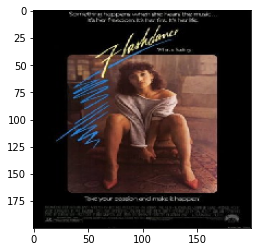

In [8]:
plt.imshow(x[1]), data["Genre"][1]

In [9]:
# Prepare Train and Test Data
y = data.drop(["Id", "Genre"], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

**Build CNN**

In [11]:
inputs = keras.Input(shape=(x_train[0].shape))

x = keras.layers.Conv2D(16, (3, 3), activation=activations.relu)(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2, 2)(x)
x = keras.layers.Dropout(0.3)(x)

x = keras.layers.Conv2D(32, (3, 3), activation=activations.relu)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2, 2)(x)
x = keras.layers.Dropout(0.3)(x)

x = keras.layers.Conv2D(64, (3, 3), activation=activations.relu)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2, 2)(x)
x = keras.layers.Dropout(0.4)(x)

x = keras.layers.Conv2D(128, (3, 3), activation=activations.relu)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2, 2)(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation=activations.relu)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(128, activation=activations.relu)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(25, activation=activations.sigmoid)(x)

model = keras.Model(inputs=inputs, outputs=[outputs], name="conv2d")

model.summary()

Model: "conv2d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640 

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"])

In [13]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
193/193 [==============================] - 389s 2s/step - loss: 0.7075 - accuracy: 0.1036 - val_loss: 1.2765 - val_accuracy: 0.0634
Epoch 2/5
193/193 [==============================] - 290s 2s/step - loss: 0.3135 - accuracy: 0.2522 - val_loss: 0.4599 - val_accuracy: 0.1901
Epoch 3/5
193/193 [==============================] - 288s 1s/step - loss: 0.2611 - accuracy: 0.3011 - val_loss: 0.8970 - val_accuracy: 0.0670
Epoch 4/5
193/193 [==============================] - 318s 2s/step - loss: 0.2508 - accuracy: 0.3114 - val_loss: 3.5476 - val_accuracy: 0.0376
Epoch 5/5
193/193 [==============================] - 318s 2s/step - loss: 0.2455 - accuracy: 0.3194 - val_loss: 0.4269 - val_accuracy: 0.1497


In [14]:
history.history

{'loss': [0.7075154185295105,
  0.31348538398742676,
  0.26107656955718994,
  0.25080493092536926,
  0.2455192357301712],
 'accuracy': [0.10364963859319687,
  0.25223034620285034,
  0.30105432868003845,
  0.3114355206489563,
  0.3193836212158203],
 'val_loss': [1.276466965675354,
  0.45991334319114685,
  0.8969794511795044,
  3.5476367473602295,
  0.42692849040031433],
 'val_accuracy': [0.06336088478565216,
  0.1900826394557953,
  0.06703397631645203,
  0.03764921799302101,
  0.14967860281467438]}

In [15]:
epoch_range = range(1, 6)

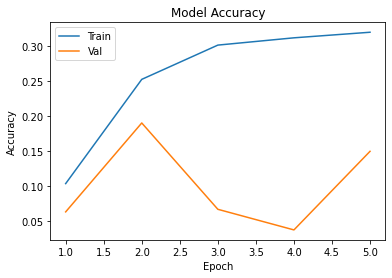

In [16]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["accuracy"])
plt.plot(epoch_range, history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

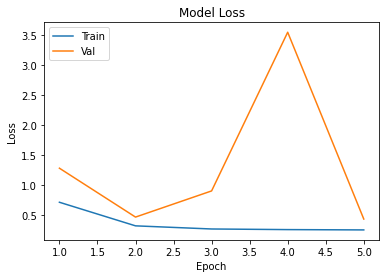

In [17]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

**Making Predictions**

In [ ]:
img = image.load_img("/content/Movies-Poster_Dataset/endgame.jpg", target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, img_width, img_height, 3)


In [ ]:
classes = data.columns[2:]
classes

In [ ]:
y_prob = model.predict(img)
y_prob, y_prob[0]

In [ ]:
#Sorting and getting top 3 predictions
top_3_predictions = np.argsort(y_prob[0])[:-4:-1]
top_3_predictions

In [ ]:
for i in range(3):
  print(classes[top_3_predictions[i]])